# Hospital Supply Chain EDA

#### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the data

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vanpatangan/hospital-supply-chain")

print("Path to dataset files:", path)

100%|██████████| 32.6k/32.6k [00:00<00:00, 32.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vanpatangan/hospital-supply-chain/versions/2


In [20]:
import os

# List all CSV files
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Load each CSV file into a DataFrame
datasets = {}
for file in csv_files:
    file_path = os.path.join(path, file)
    datasets[file] = pd.read_csv(file_path)
    print(f"Loaded {file}")


Loaded inventory_data.csv
Loaded financial_data.csv
Loaded patient_data.csv
Loaded vendor_data.csv
Loaded staff_data.csv


#### Investigating Data

In [36]:
def data_info(df):
    print("\n" + "="*40)
    print("DataFrame Info:\n")
    df.info()
    print("\n" + "="*40)

    print("Statistical Summary:\n")
    print(df.describe())
    print("\n" + "="*40)

    print(f"DataFrame Shape: {df.shape}")
    print("="*40 + "\n")

    print("Missing Values:\n")
    print(df.isnull().sum())
    print("\n")

In [37]:
data_info(datasets['inventory_data.csv'])


DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               500 non-null    object 
 1   Item_ID            500 non-null    int64  
 2   Item_Type          500 non-null    object 
 3   Item_Name          500 non-null    object 
 4   Current_Stock      500 non-null    int64  
 5   Min_Required       500 non-null    int64  
 6   Max_Capacity       500 non-null    int64  
 7   Unit_Cost          500 non-null    float64
 8   Avg_Usage_Per_Day  500 non-null    int64  
 9   Restock_Lead_Time  500 non-null    int64  
 10  Vendor_ID          500 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 43.1+ KB

Statistical Summary:

          Item_ID  Current_Stock  Min_Required  Max_Capacity    Unit_Cost  \
count  500.000000     500.000000    500.000000    500.000000    500.00000   
mean   104.50

In [38]:
data_info(datasets['financial_data.csv'])


DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Expense_Category  500 non-null    object 
 2   Amount            500 non-null    float64
 3   Description       500 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.8+ KB

Statistical Summary:

             Amount
count    500.000000
mean   24720.491460
std    13731.361055
min     1110.270000
25%    13213.532500
50%    24028.275000
75%    36010.815000
max    49581.160000

DataFrame Shape: (500, 4)

Missing Values:

Date                0
Expense_Category    0
Amount              0
Description         0
dtype: int64




In [39]:
data_info(datasets['patient_data.csv'])


DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_ID           500 non-null    object
 1   Admission_Date       500 non-null    object
 2   Discharge_Date       500 non-null    object
 3   Primary_Diagnosis    500 non-null    object
 4   Procedure_Performed  500 non-null    object
 5   Room_Type            500 non-null    object
 6   Bed_Days             500 non-null    int64 
 7   Supplies_Used        500 non-null    object
 8   Equipment_Used       500 non-null    object
 9   Staff_Needed         500 non-null    object
dtypes: int64(1), object(9)
memory usage: 39.2+ KB

Statistical Summary:

         Bed_Days
count  500.000000
mean     7.364000
std      4.079803
min      1.000000
25%      4.000000
50%      7.000000
75%     11.000000
max     14.000000

DataFrame Shape: (500, 10)

Missing Values:

Patient

In [40]:
data_info(datasets['vendor_data.csv'])


DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vendor_ID             3 non-null      object 
 1   Vendor_Name           3 non-null      object 
 2   Item_Supplied         3 non-null      object 
 3   Avg_Lead_Time (days)  3 non-null      int64  
 4   Cost_Per_Item         3 non-null      float64
 5   Last_Order_Date       3 non-null      object 
 6   Next_Delivery_Date    3 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 296.0+ bytes

Statistical Summary:

       Avg_Lead_Time (days)  Cost_Per_Item
count              3.000000       3.000000
mean              16.666667    8333.500000
std               12.583057   10408.129839
min                5.000000       0.500000
25%               10.000000    2500.250000
50%               15.000000    5000.000000
75%               22.500000   12

In [41]:
data_info(datasets['staff_data.csv'])


DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Staff_ID            500 non-null    object
 1   Staff_Type          500 non-null    object
 2   Shift_Date          500 non-null    object
 3   Shift_Start_Time    500 non-null    object
 4   Shift_End_Time      500 non-null    object
 5   Current_Assignment  500 non-null    object
 6   Hours_Worked        500 non-null    int64 
 7   Patients_Assigned   500 non-null    int64 
 8   Overtime_Hours      500 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 35.3+ KB

Statistical Summary:

       Hours_Worked  Patients_Assigned  Overtime_Hours
count    500.000000         500.000000      500.000000
mean       9.548000           4.990000        1.962000
std        1.105505           2.538264        1.434109
min        8.000000           1.000000        0.000000
2

In [46]:
datasets['inventory_data.csv'].head()

,Date,Item_ID,Item_Type,Item_Name,Current_Stock,Min_Required,Max_Capacity,Unit_Cost,Avg_Usage_Per_Day,Restock_Lead_Time,Vendor_ID
0,2024-10-01,105,Consumable,Ventilator,1542,264,1018,4467.55,108,17,V001
1,2024-10-02,100,Equipment,Ventilator,2487,656,3556,5832.29,55,12,V001
2,2024-10-03,103,Equipment,Surgical Mask,2371,384,5562,16062.98,470,6,V001
3,2024-10-04,103,Consumable,Surgical Mask,2038,438,1131,744.10,207,15,V002
4,2024-10-05,107,Equipment,IV Drip,2410,338,1013,15426.53,158,12,V003


In [47]:
datasets['financial_data.csv'].head()

,Date,Expense_Category,Amount,Description
0,2024-10-01,Staffing,29391.86,Surgical masks
1,2024-10-02,Supplies,47757.71,Surgical masks
2,2024-10-03,Supplies,43996.60,Ventilators
3,2024-10-04,Supplies,27908.42,Surgeons' salaries
4,2024-10-05,Equipment,39719.60,Ventilators


In [48]:
datasets['patient_data.csv'].head()

,Patient_ID,Admission_Date,Discharge_Date,Primary_Diagnosis,Procedure_Performed,Room_Type,Bed_Days,Supplies_Used,Equipment_Used,Staff_Needed
0,P001,2024-10-06 05:30:28,2024-10-23 01:11:34,Diabetes,Appendectomy,General Ward,2,"Gloves, IV",Surgical Table,2 Surgeons
1,P002,2024-10-24 11:07:58,2024-10-15 05:16:54,Fracture,Appendectomy,ICU,10,"Gown, IV",MRI Machine,1 Nurse
2,P003,2024-10-22 21:43:43,2024-10-24 10:56:30,Fracture,Chest X-ray,ICU,10,"Gloves, IV",X-ray Machine,"1 Nurse, 1 Doctor"
3,P004,2024-10-05 17:04:05,2024-10-30 14:10:01,Diabetes,Chest X-ray,ICU,11,"Gloves, IV",X-ray Machine,1 Nurse
4,P005,2024-10-21 17:04:00,2024-10-08 15:53:22,Appendicitis,MRI,ICU,2,"Gloves, IV",X-ray Machine,2 Surgeons


In [49]:
datasets['vendor_data.csv'].head()

,Vendor_ID,Vendor_Name,Item_Supplied,Avg_Lead_Time (days),Cost_Per_Item,Last_Order_Date,Next_Delivery_Date
0,V001,MedSupplies Inc.,Surgical Mask,5,0.5,2024-09-28,2024-10-03
1,V002,EquipMed Co.,Ventilator,30,20000.0,2024-09-01,2024-10-15
2,V003,HealthTools Ltd.,X-ray Machine,15,5000.0,2024-09-15,2024-10-05


In [50]:
datasets['staff_data.csv'].head()

,Staff_ID,Staff_Type,Shift_Date,Shift_Start_Time,Shift_End_Time,Current_Assignment,Hours_Worked,Patients_Assigned,Overtime_Hours
0,S001,Surgeon,2024-10-22 04:44:49,06:00 PM,07:00 PM,ER,8,9,1
1,S002,Nurse,2024-10-03 05:51:36,08:00 AM,06:00 PM,General Ward,9,3,0
2,S003,Technician,2024-10-15 15:11:14,08:00 AM,06:00 PM,ER,8,6,4
3,S004,Surgeon,2024-10-09 20:07:58,07:00 AM,06:00 PM,General Ward,11,6,3
4,S005,Surgeon,2024-10-12 05:01:02,07:00 AM,06:00 AM,General Ward,9,5,3


In [52]:
inventory_data = datasets['inventory_data.csv']
financial_data = datasets['financial_data.csv']
patient_data = datasets['patient_data.csv']
vendor_data = datasets['vendor_data.csv']
staff_data = datasets['staff_data.csv']

# Rename Date columns
inventory_data = inventory_data.rename(columns={'Date': 'Inventory_Date'})
financial_data = financial_data.rename(columns={'Date': 'Financial_Date'})

# Convert date columns to datetime
inventory_data['Inventory_Date'] = pd.to_datetime(inventory_data['Inventory_Date'])
patient_data['Admission_Date'] = pd.to_datetime(patient_data['Admission_Date'])
patient_data['Discharge_Date'] = pd.to_datetime(patient_data['Discharge_Date'])
staff_data['Shift_Date'] = pd.to_datetime(staff_data['Shift_Date'])
financial_data['Financial_Date'] = pd.to_datetime(financial_data['Financial_Date'])

# Combine dataframes
hospital_data = pd.concat([inventory_data, patient_data, staff_data, financial_data], axis=1)
hospital_data.fillna(0, inplace=True)

#### EDA

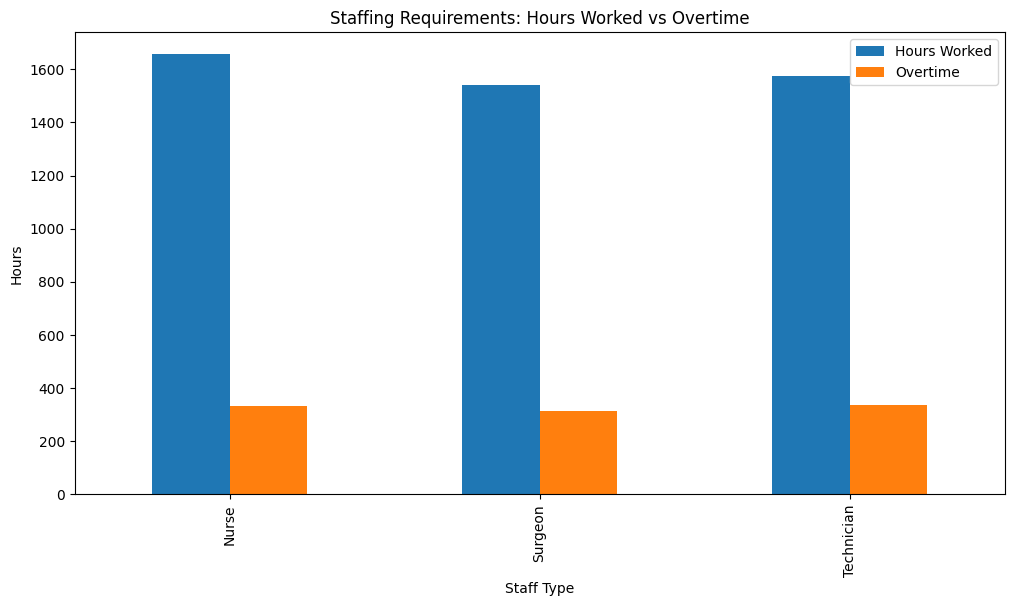

In [53]:
# Staff vs Hours Worked
staff = hospital_data.groupby('Staff_Type').agg({'Hours_Worked': 'sum', 'Overtime_Hours': 'sum'}).reset_index()
staff.plot(x='Staff_Type', kind='bar', stacked=False, figsize=(12, 6))

# Labels and titles
plt.title('Staffing Requirements: Hours Worked vs Overtime')
plt.ylabel('Hours')
plt.xlabel('Staff Type')
plt.legend(['Hours Worked', 'Overtime'])

plt.show()

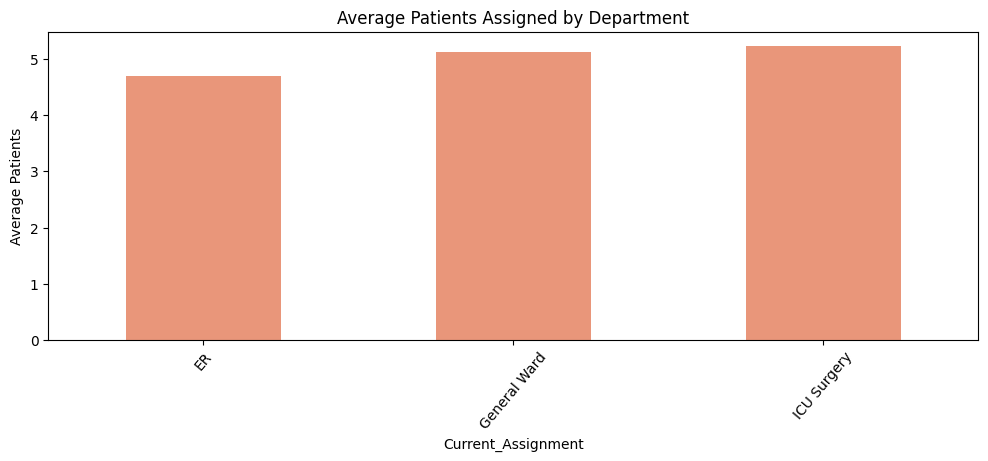

In [65]:
# Number of patients assigned to staff in different hospital areas

plt.figure(figsize=(12, 4))

hospital_data.groupby('Current_Assignment')['Patients_Assigned'].mean().plot(kind='bar', color='darksalmon')

# Labels and title
plt.title('Average Patients Assigned by Department')
plt.ylabel('Average Patients')
plt.xticks(rotation=50)

plt.show()

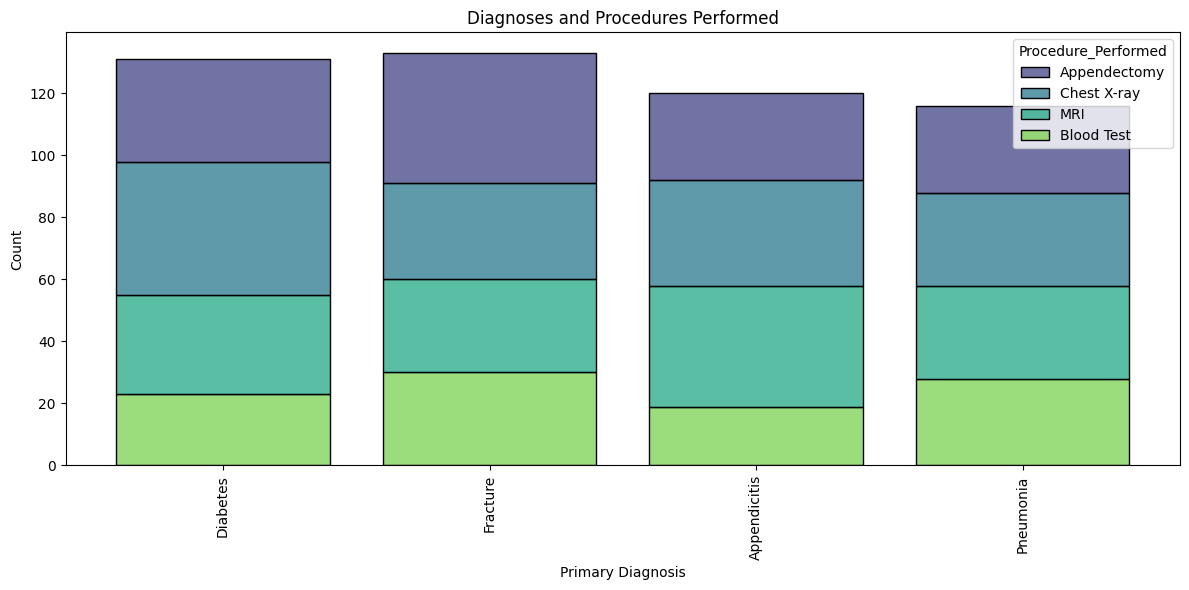

In [54]:
# Patient diagnosis and Procedures Performed
plt.figure(figsize=(12, 6))

sns.histplot(data=hospital_data, x='Primary_Diagnosis', hue='Procedure_Performed', multiple='stack', shrink=0.8, palette='viridis')
plt.xticks(rotation=90)

# Labels and title
plt.title('Diagnoses and Procedures Performed')
plt.ylabel('Count')
plt.xlabel('Primary Diagnosis')
plt.tight_layout()
plt.show()

<ipython-input-55-b74d874fbb40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Room_Type', y='Bed_Days', data=hospital_data, palette='viridis')


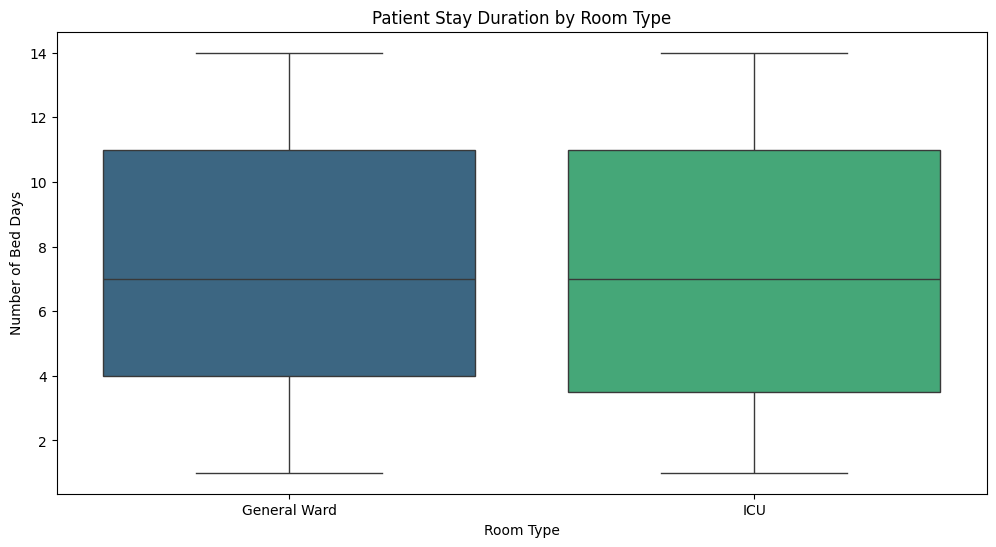

In [55]:
# Patient stay duration
plt.figure(figsize=(12, 6))

sns.boxplot(x='Room_Type', y='Bed_Days', data=hospital_data, palette='viridis')

# Labels and Title
plt.title('Patient Stay Duration by Room Type')
plt.ylabel('Number of Bed Days')
plt.xlabel('Room Type')

plt.show()

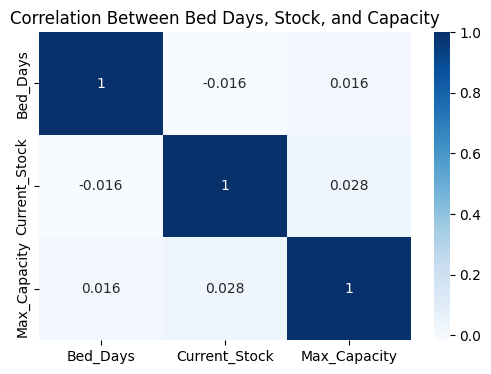

In [62]:
# Correlation between bed days and supplies/equipment usage
correlation = hospital_data[['Bed_Days', 'Current_Stock', 'Max_Capacity']].corr()

plt.figure(figsize=(6, 4))

sns.heatmap(correlation, annot=True, cmap='Blues')

plt.title('Correlation Between Bed Days, Stock, and Capacity')
plt.show()

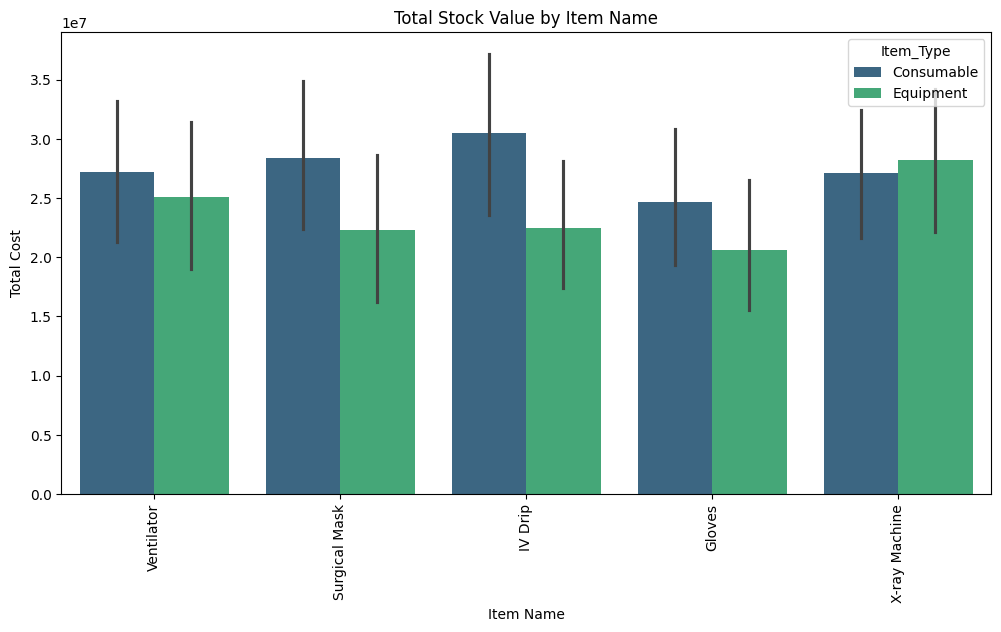

In [63]:
# Inventory cost analysis
hospital_data['Total_Stock_Value'] = hospital_data['Current_Stock'] * hospital_data['Unit_Cost']
plt.figure(figsize=(12, 6))

sns.barplot(x='Item_Name', y='Total_Stock_Value', hue='Item_Type', data=hospital_data, palette='viridis')

plt.xticks(rotation=90)
plt.title('Total Stock Value by Item Name')
plt.ylabel('Total Cost')
plt.xlabel('Item Name')

plt.show()

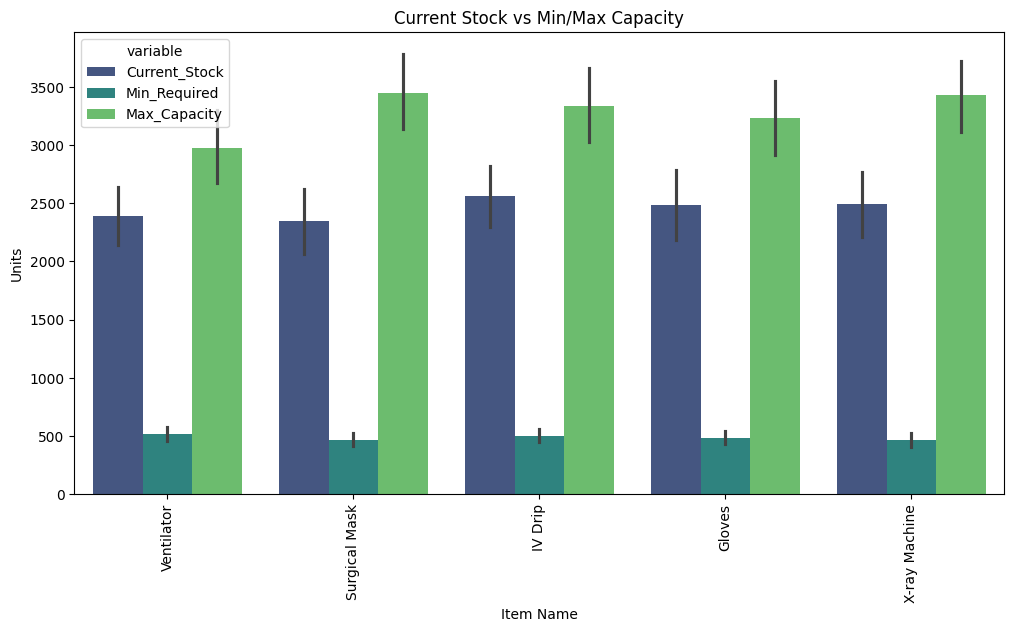

In [64]:
# Current_Stock vs Min_Required and Max_Capacity
plt.figure(figsize=(12, 6))
hospital_data_melted = hospital_data.melt(id_vars=["Item_Name"], value_vars=["Current_Stock", "Min_Required", "Max_Capacity"])

sns.barplot(x='Item_Name', y='value', hue='variable', data=hospital_data_melted, palette='viridis')

plt.xticks(rotation=90)
plt.title('Current Stock vs Min/Max Capacity')
plt.ylabel('Units')
plt.xlabel('Item Name')

plt.show()

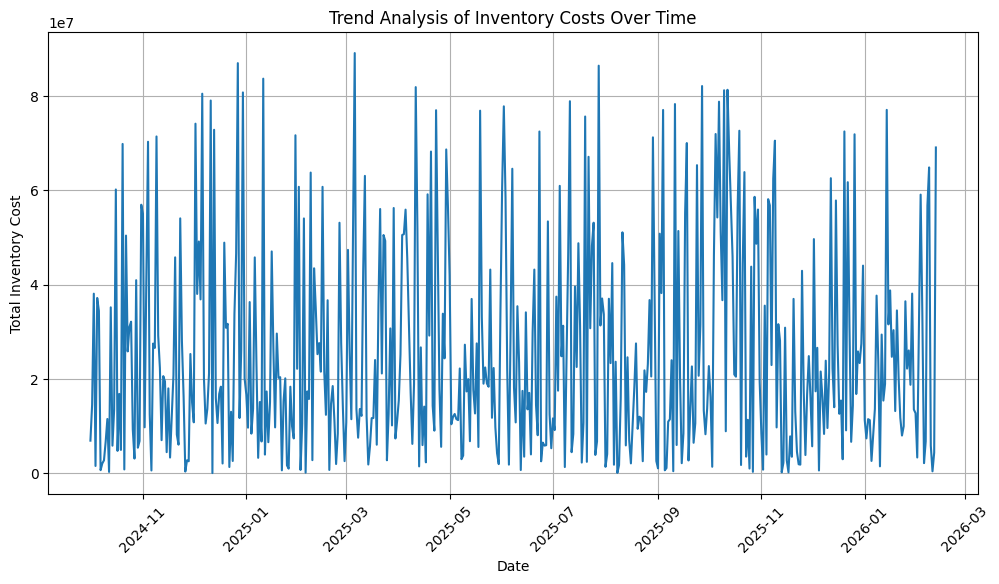

In [66]:
# Inventory cost over time
inventory_cost_over_time = hospital_data.groupby('Inventory_Date')['Total_Stock_Value'].sum()

# Create the trend plot
plt.figure(figsize=(12, 6))

plt.plot(inventory_cost_over_time.index, inventory_cost_over_time.values)
plt.xlabel('Date')
plt.ylabel('Total Inventory Cost')
plt.title('Trend Analysis of Inventory Costs Over Time')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [68]:
# Identify outliers in inventory costs
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

inventory_outliers = find_outliers_iqr(hospital_data['Total_Stock_Value'])
print("Outliers in Total Stock Value:\n", inventory_outliers)

Outliers in Total Stock Value:
 87     87017745.75
90     80801226.80
102    83722424.37
156    89155904.00
192    81928708.12
300    86477501.88
361    82157149.68
374    81261257.73
376    81362958.54
Name: Total_Stock_Value, dtype: float64


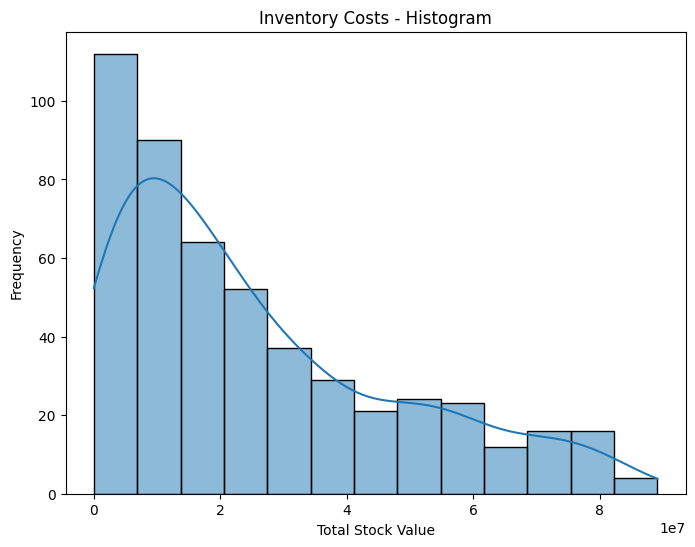

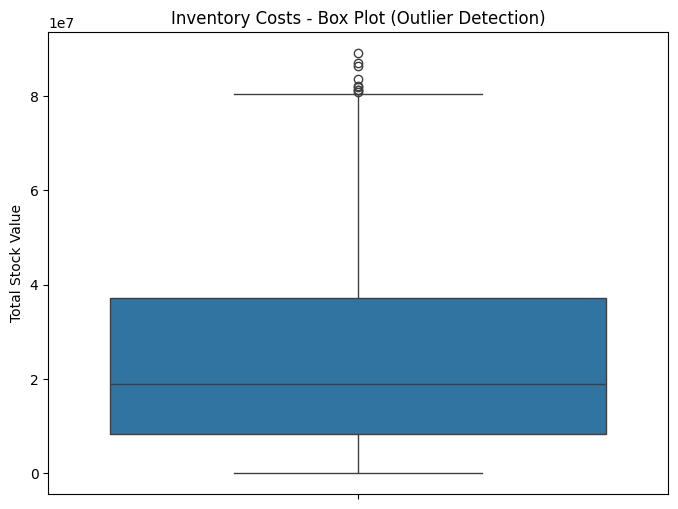

In [69]:
# Outliers in inventory costs

plt.figure(figsize=(8, 6))
sns.histplot(hospital_data['Total_Stock_Value'], kde=True)
plt.title('Inventory Costs - Histogram')
plt.xlabel('Total Stock Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=hospital_data['Total_Stock_Value'])
plt.title('Inventory Costs - Box Plot (Outlier Detection)')
plt.ylabel('Total Stock Value')
plt.show()